In [22]:
import pandas as pd
import numpy as np

In [52]:
iris=pd.read_csv("Downloads\iris (1).csv")

In [53]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [55]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [56]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])

In [58]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [59]:
species_name = le.classes_
print(species_name)

['setosa' 'versicolor' 'virginica']


In [60]:
iris.shape

(150, 5)

In [61]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = iris[feature_columns].values
y = iris['species'].values

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

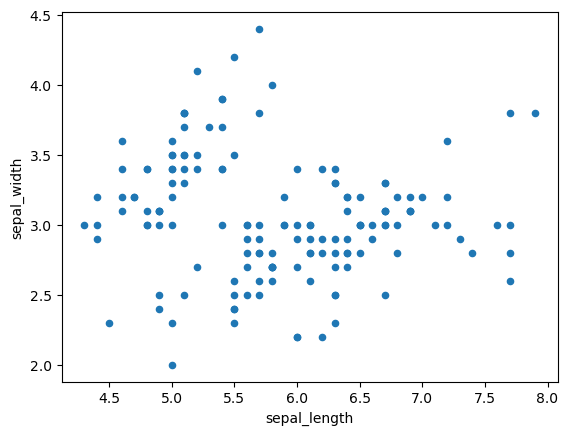

In [67]:
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

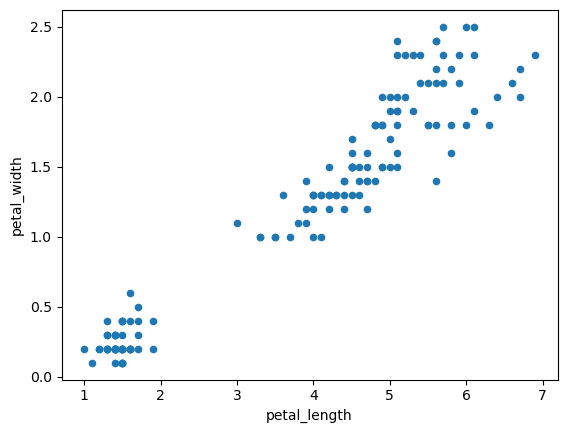

In [68]:
iris.plot(kind="scatter", x="petal_length", y="petal_width")

In [77]:
from sklearn.tree import   DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
classifier   = DecisionTreeClassifier()
classifier.fit(X_train,y_train) 
y_pred   = classifier.predict(X_test) 
print(classification_report(y_test,   y_pred)) 
print(confusion_matrix(y_test, y_pred)) 
print('accuracy   is',accuracy_score(y_pred,y_test)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy   is 1.0


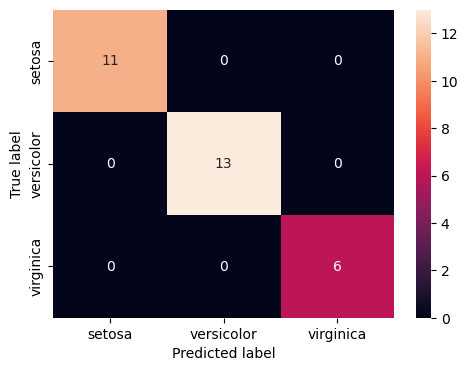

In [78]:
import seaborn as sns
cm  = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm,index = ['setosa','versicolor','virginica'], columns = ['setosa','versicolor','virginica'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df,   annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

   sepal_width  petal_length  petal_width  species
0          3.5           1.4          0.2        0
1          3.0           1.4          0.2        0
2          3.2           1.3          0.2        0
3          3.1           1.5          0.2        0
4          3.6           1.4          0.2        0


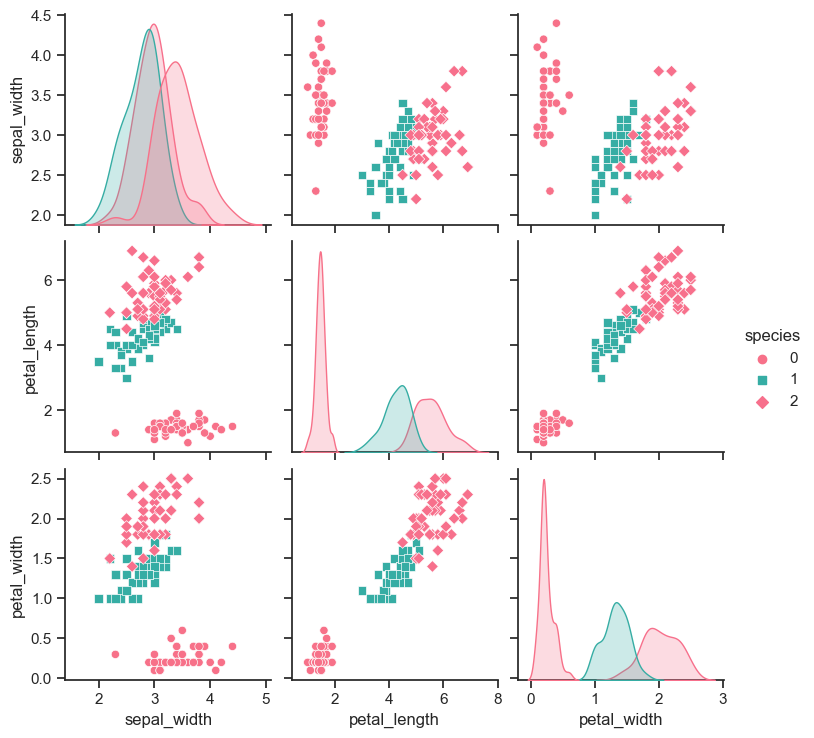

In [93]:
sns.set(style="ticks", color_codes=True)
iris= iris.drop(iris.columns[[0]], axis=1)
print(iris.head())
sns.pairplot(iris, hue="species", palette="husl", markers=["o", "s", "D"])